In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(r"C:\Users\SAMAR\PycharmProjects\Naresh IT\Classroom\Python seassons\data files\winequality_red - winequality_red.csv")
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3072,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,6.3,0.390,0.16,1.4,0.080,11.0,23.0,0.99550,3.34,0.56,9.3,5.0
1595,9.3,0.370,0.44,1.6,0.038,21.0,42.0,0.99526,3.24,0.81,10.8,7.0
1756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1205,7.7,0.835,0.00,2.6,0.081,6.0,14.0,0.99750,3.30,0.52,9.3,5.0


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
df.select_dtypes(exclude="object").columns


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
visa_df = pd.read_csv(r"C:\Users\SAMAR\PycharmProjects\Naresh IT\Classroom\Python seassons\data files\Visadataset - Visadataset.csv")
visa_df.head(2)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified


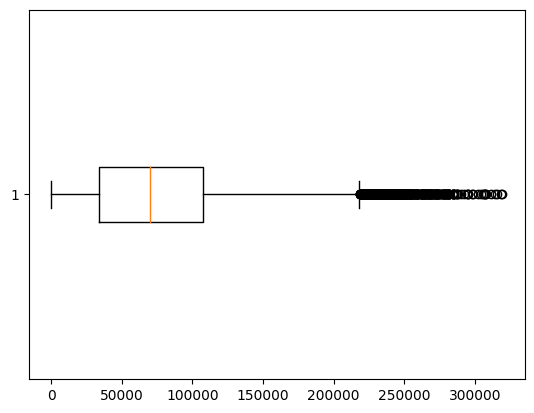

In [12]:
plt.boxplot(visa_df["prevailing_wage"],vert=False,)
plt.show()

<Axes: >

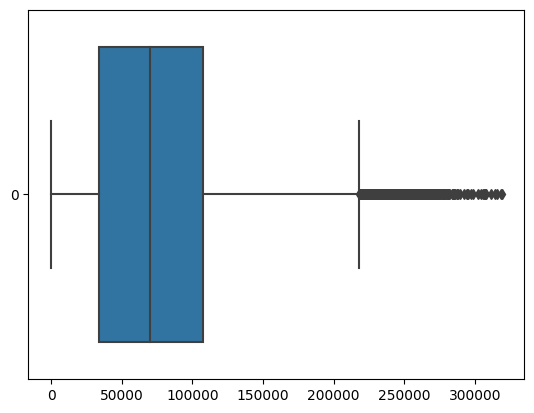

In [15]:
sns.boxplot(visa_df["prevailing_wage"],orient='h')

<Axes: >

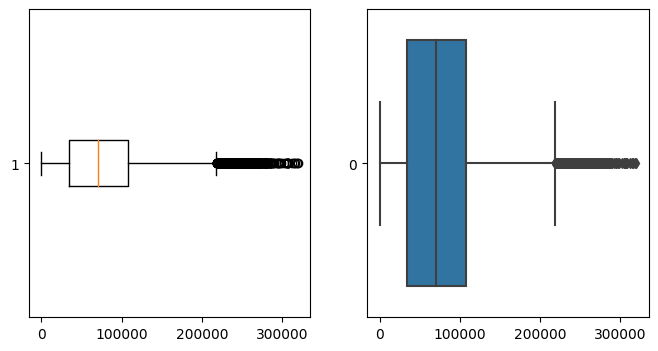

In [20]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1).boxplot(visa_df["prevailing_wage"],vert=False)
plt.subplot(1,2,2)
sns.boxplot(visa_df["prevailing_wage"],orient="h")

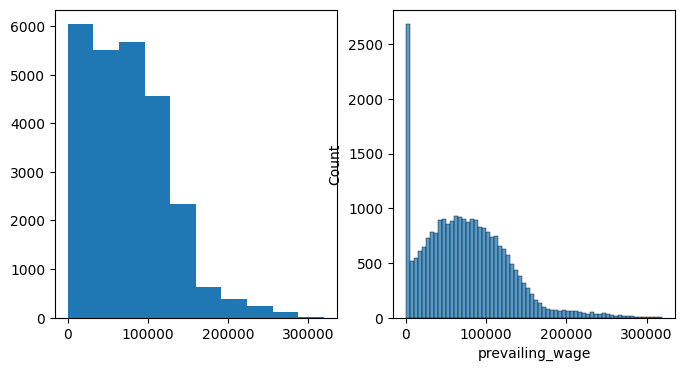

In [24]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1).hist(visa_df["prevailing_wage"])
plt.subplot(1,2,2)
sns.histplot(visa_df["prevailing_wage"])
plt.show()

Outlairs

In [25]:
wage_25p = np.percentile(visa_df["prevailing_wage"],25)
wage_75p = np.percentile(visa_df["prevailing_wage"],75)

In [26]:
q1,q3 = wage_25p,wage_75p

In [28]:
iqr = round(q3-q1,2)
iqr

73720.03

In [37]:
lb = q1-1.5*iqr
ub = q3+1.5*iqr
print(lb,ub)

-76564.565 218315.5575


In [35]:
con1  = visa_df['prevailing_wage']<lb
con2 = visa_df["prevailing_wage"]>ub

outlairs = visa_df[con1 | con2]


In [36]:
con1  = visa_df['prevailing_wage']>lb
con2 = visa_df["prevailing_wage"]<ub

non_outlairs = visa_df[con1 & con2]

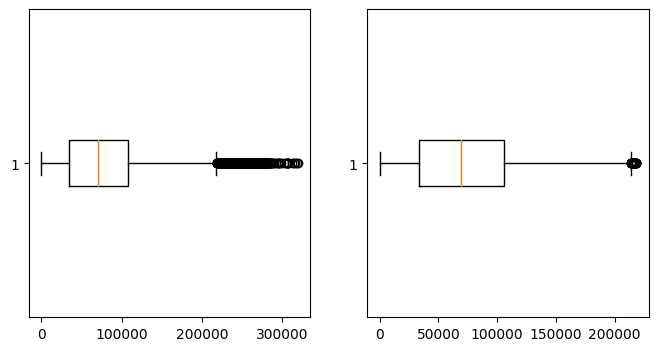

In [40]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1).boxplot(visa_df["prevailing_wage"],vert=False)
# sns.boxplot(outlairs["prevailing_wage"])

plt.subplot(1,2,2).boxplot(non_outlairs["prevailing_wage"],vert=False)
# sns.boxplot(non_outlairs["prevailing_wage"])
plt.show()

In [42]:
median = visa_df['prevailing_wage'].median()

In [43]:
median_values = []
for i in visa_df["prevailing_wage"].values:
    if i <lb or i >ub:
        median_values.append(median)
    else:
        median_values.append(i)


In [44]:
visa_df_copy = visa_df.copy()

In [47]:
visa_df_copy["prevailing_wage"] = median_values

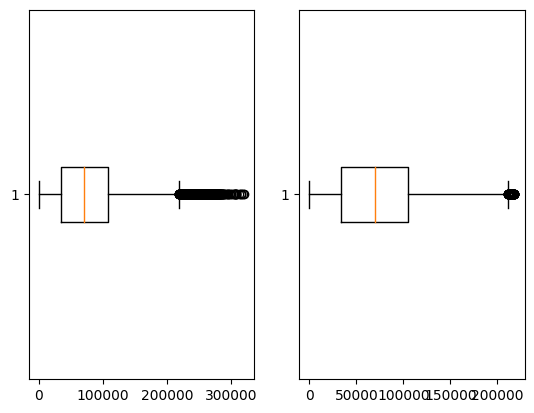

In [48]:
plt.subplot(1,2,1).boxplot(visa_df["prevailing_wage"],vert=False)
plt.subplot(1,2,2).boxplot(visa_df_copy["prevailing_wage"],vert=False)
plt.show()

## using np.where for outlairs


In [49]:
con1 = visa_df["prevailing_wage"]<lb
con2 = visa_df["prevailing_wage"]>ub
con = con1 | con2
new = np.where(con,median,visa_df['prevailing_wage'])
new

array([   592.2029,  83425.65  , 122996.86  , ..., 146298.85  ,
        86154.77  ,  70876.91  ])

In [52]:
visa_df_copy2 = visa_df.copy()
visa_df_copy2["prevailing_wage"] = new

<Axes: >

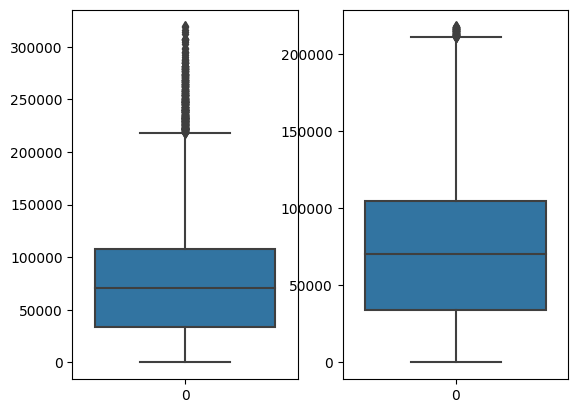

In [55]:
plt.subplot(1,2,1)
sns.boxplot(visa_df["prevailing_wage"])
plt.subplot(1,2,2)
sns.boxplot(visa_df_copy2["prevailing_wage"])


<Axes: xlabel='prevailing_wage', ylabel='Density'>

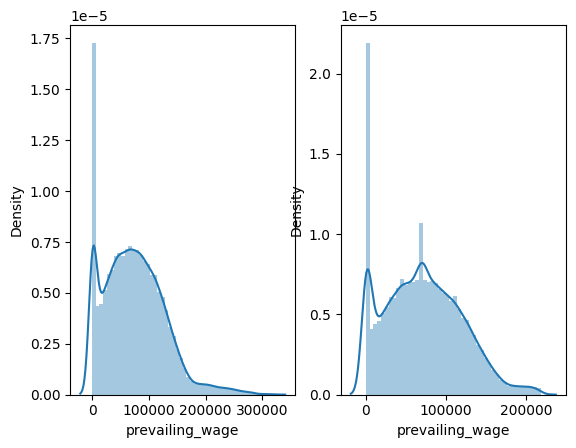

In [59]:
plt.subplot(1,2,1)
sns.distplot(visa_df["prevailing_wage"])
plt.subplot(1,2,2)
sns.distplot(visa_df_copy2["prevailing_wage"])
